<a href="https://colab.research.google.com/github/AsmaShaikhTMU/Projects/blob/main/EDA_Report_Dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn markdown2 weasyprint

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 850.6/850.6 kB 36.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import markdown2
import weasyprint

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


In [ ]:
#import pandas as pd

In [ ]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
display(df.describe())

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


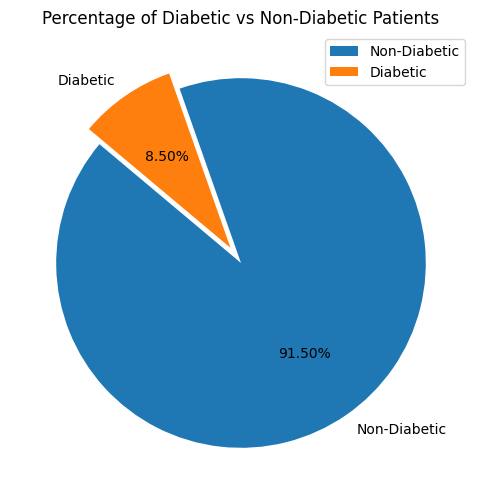

In [ ]:
# Count occurrences of diabetic vs non-diabetic cases
diabetes_counts = df['diabetes'].value_counts().to_dict()  # Convert to dictionary to avoid KeyError

# Ensure both labels exist in the correct order
sizes = [diabetes_counts.get(0, 0), diabetes_counts.get(1, 0)]  # Handles cases where values might be missing
labels = ['Non-Diabetic', 'Diabetic']
colors = ['#1f77b4', '#ff7f0e']  # Custom colors for clarity
explode = (0, 0.1)  # Slightly separate "Diabetic" slice for emphasis

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140, explode=explode)
plt.title("Percentage of Diabetic vs Non-Diabetic Patients")
plt.legend(labels, loc="upper right")
plt.show()


In [ ]:
categorical_columns = ['gender', 'smoking_history']  # Adjust as needed
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in gender: ['Female' 'Male' 'Other']
Unique values in smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [ ]:
# Count occurrences of each gender category
gender_counts = df['gender'].value_counts()
print(gender_counts)


gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


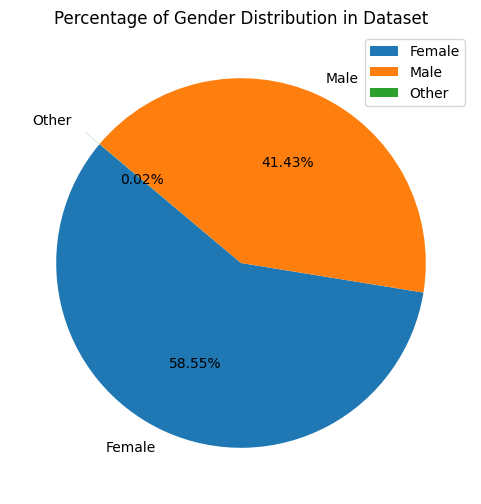

In [ ]:
# Count occurrences of each gender category
gender_counts = df['gender'].value_counts()

# Data for the pie chart
labels = gender_counts.index.tolist()  # Extract unique gender labels
sizes = gender_counts.values  # Extract corresponding counts
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Assign colors
explode = (0, 0, 0.1) if 'Other' in labels else (0, 0)  # Slightly separate 'Other' if it exists

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140, explode=explode)
plt.title("Percentage of Gender Distribution in Dataset")
plt.legend(labels, loc="upper right")
plt.show()


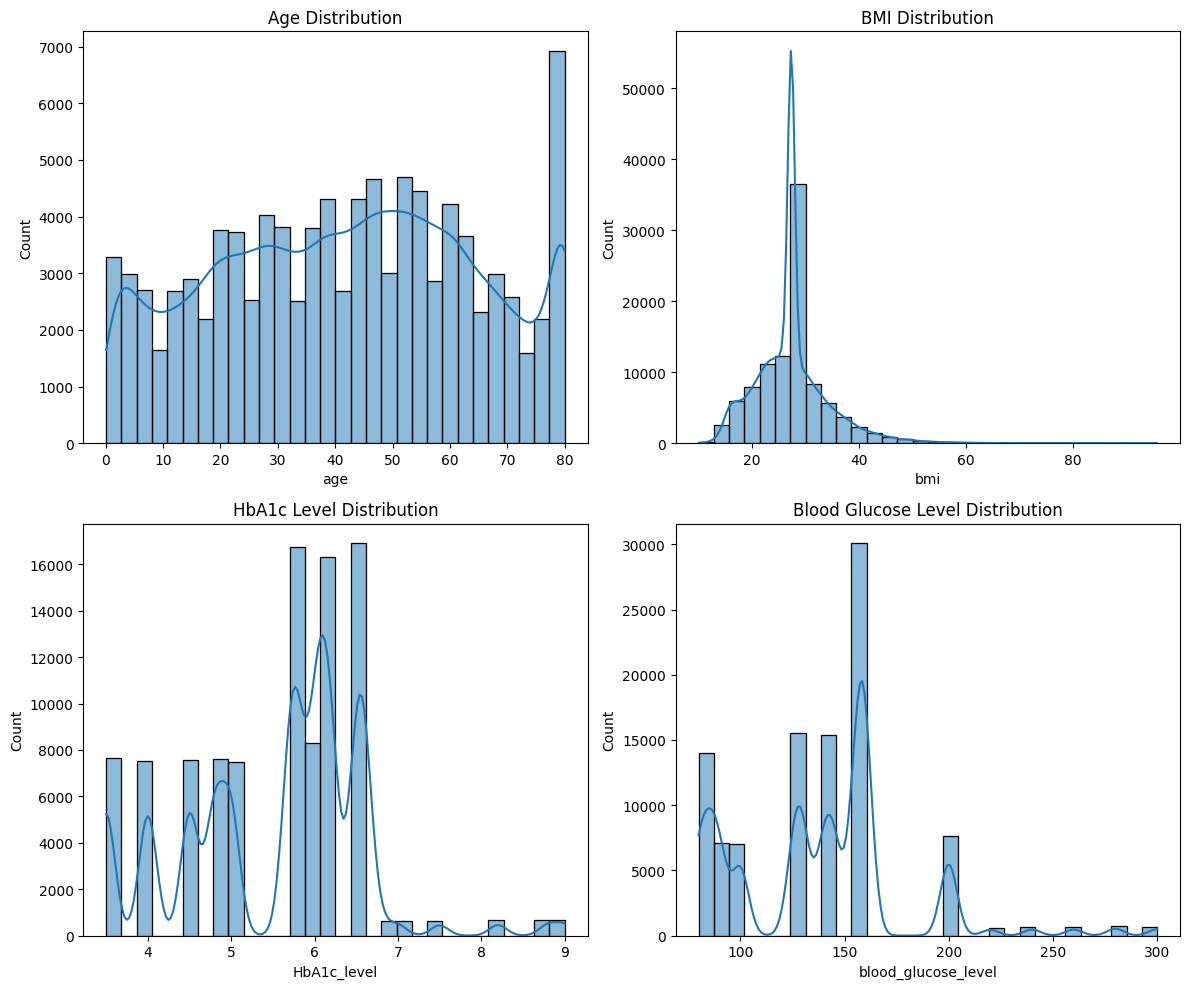

In [ ]:
# Plot distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['bmi'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('BMI Distribution')

sns.histplot(df['HbA1c_level'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('HbA1c Level Distribution')

sns.histplot(df['blood_glucose_level'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Blood Glucose Level Distribution')

plt.tight_layout()
plt.show()

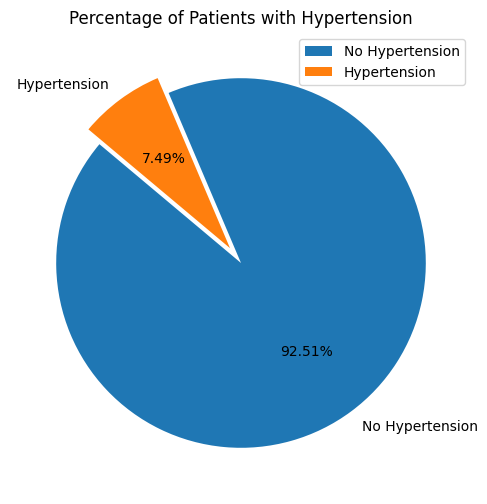

In [ ]:
# Count occurrences of each hypertension category
hypertension_counts = df['hypertension'].value_counts()

# Data for the pie chart
labels = ['No Hypertension', 'Hypertension']
sizes = [hypertension_counts[0], hypertension_counts[1]]  # Extract counts
colors = ['#1f77b4', '#ff7f0e']  # Custom colors for clarity
explode = (0, 0.1)  # Slightly separate "Hypertension" slice for emphasis

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140, explode=explode)
plt.title("Percentage of Patients with Hypertension")
plt.legend(labels, loc="upper right")
plt.show()


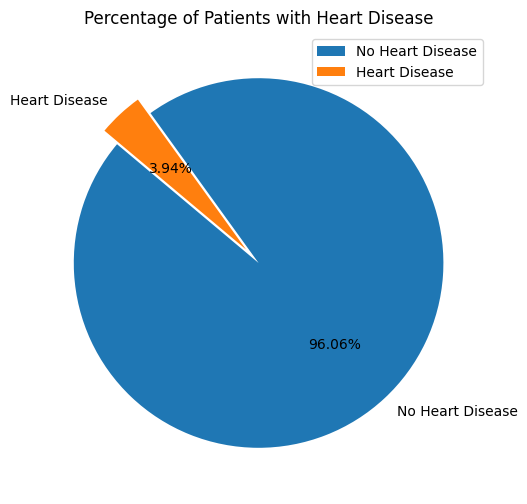

In [ ]:
# Count occurrences of each heart disease category
heart_disease_counts = df['heart_disease'].value_counts()

# Data for the pie chart
labels = ['No Heart Disease', 'Heart Disease']
sizes = [heart_disease_counts[0], heart_disease_counts[1]]  # Extract counts
colors = ['#1f77b4', '#ff7f0e']  # Custom colors for clarity
explode = (0, 0.1)  # Slightly separate "Heart Disease" slice for emphasis

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140, explode=explode)
plt.title("Percentage of Patients with Heart Disease")
plt.legend(labels, loc="upper right")
plt.show()



In [ ]:
# Count occurrences of each smoking history category
smoking_counts = df['smoking_history'].value_counts().reset_index()
smoking_counts.columns = ['Smoking History', 'Count']

# Calculate frequency (percentage)
smoking_counts['Frequency (%)'] = (smoking_counts['Count'] / df.shape[0]) * 100

# Display the table
print(smoking_counts)


  Smoking History  Count  Frequency (%)
0         No Info  35816         35.816
1           never  35095         35.095
2          former   9352          9.352
3         current   9286          9.286
4     not current   6447          6.447
5            ever   4004          4.004


In [ ]:
# Get the range of HbA1c levels
hbA1c_min = df['HbA1c_level'].min()
hbA1c_max = df['HbA1c_level'].max()

# Define HbA1c categories
hbA1c_bins = [0, 5.7, 6.4, float('inf')]
hbA1c_labels = ['≤ 5.7% (Non-Diabetic)', '5.7% - 6.4% (Prediabetic)', '≥ 6.5% (Diabetic)']

# Categorize patients based on HbA1c levels
df['HbA1c_Category'] = pd.cut(df['HbA1c_level'], bins=hbA1c_bins, labels=hbA1c_labels, include_lowest=True)

# Count occurrences in each category
hbA1c_counts = df['HbA1c_Category'].value_counts().reset_index()
hbA1c_counts.columns = ['HbA1c Category', 'Count']

# Calculate percentage
hbA1c_counts['Percentage (%)'] = (hbA1c_counts['Count'] / df.shape[0]) * 100

# Display the results
print(f"HbA1c levels range from {hbA1c_min}% to {hbA1c_max}%.\n")
print(hbA1c_counts)


HbA1c levels range from 3.5% to 9.0%.

              HbA1c Category  Count  Percentage (%)
0      ≤ 5.7% (Non-Diabetic)  46270          46.270
1  5.7% - 6.4% (Prediabetic)  32933          32.933
2          ≥ 6.5% (Diabetic)  20797          20.797


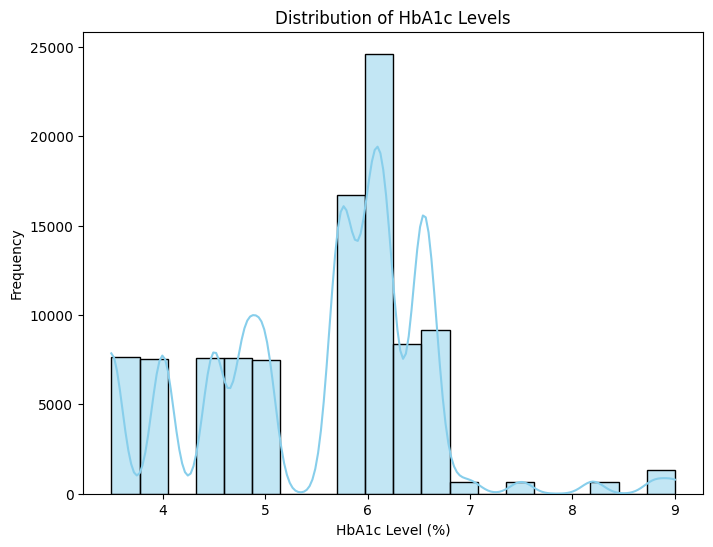

In [ ]:
# prompt: histogram for HbA1C

import matplotlib.pyplot as plt
# Plotting the histogram for HbA1c levels with a density curve
plt.figure(figsize=(8, 6))
sns.histplot(df['HbA1c_level'], bins=20, kde=True, color='skyblue')  # Increased bins for better granularity
plt.title('Distribution of HbA1c Levels')
plt.xlabel('HbA1c Level (%)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-32-6feb8259eba6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HbA1c_Category', data=df, palette='viridis')


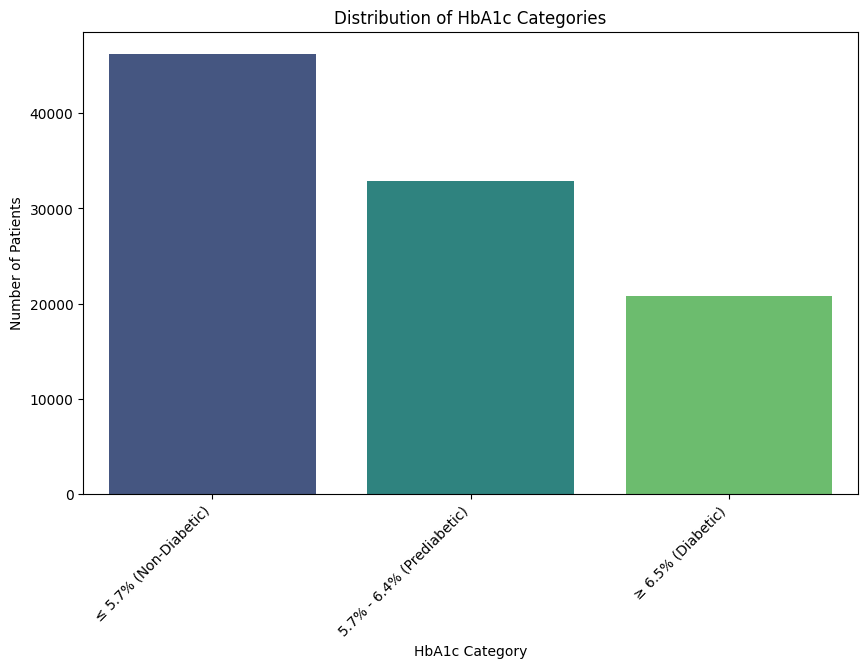

In [ ]:
# prompt: historgram for this About ≤ 5.7% being non-diabetic, 5.7% - 6.4% being prediabetic, and ≥ 6.5% being diabetic.

import matplotlib.pyplot as plt
# Plotting the histogram for HbA1c categories
plt.figure(figsize=(10, 6))
sns.countplot(x='HbA1c_Category', data=df, palette='viridis')
plt.title('Distribution of HbA1c Categories')
plt.xlabel('HbA1c Category')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


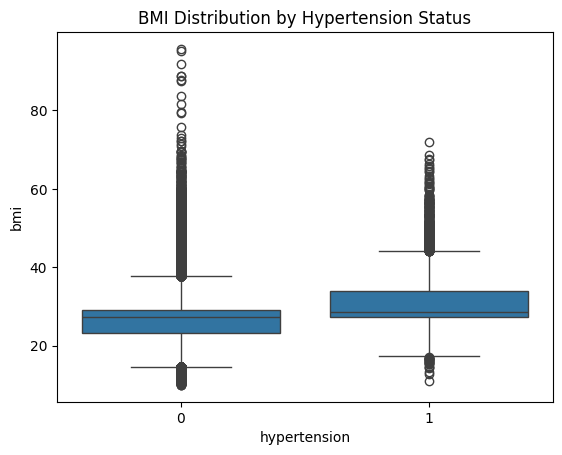

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['hypertension'], y=df['bmi'])
plt.title("BMI Distribution by Hypertension Status")
plt.show()


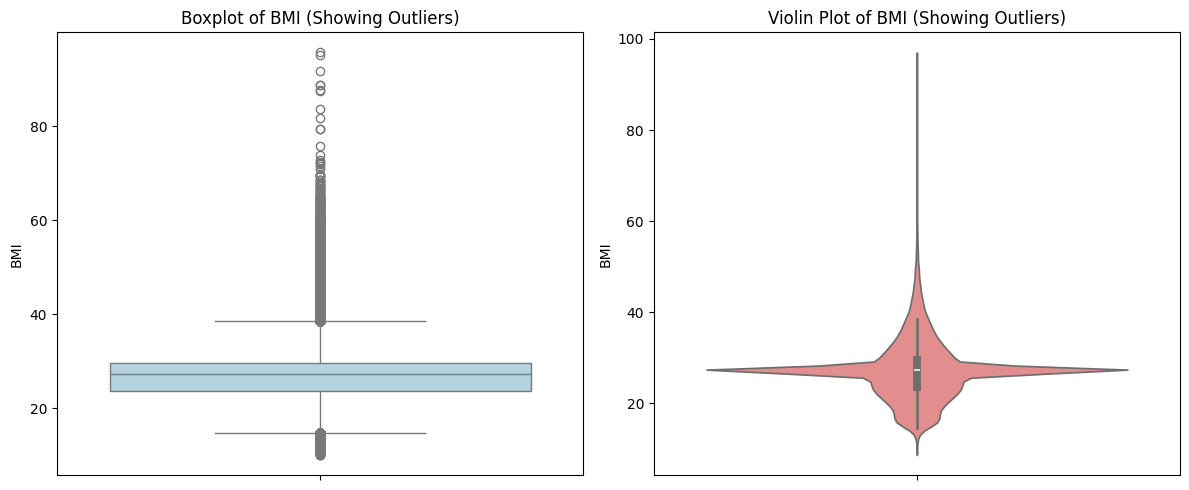

In [ ]:
# Set figure size
plt.figure(figsize=(12, 5))

# Create a boxplot for BMI to show outliers
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
sns.boxplot(y=df['bmi'], color='lightblue')
plt.title("Boxplot of BMI (Showing Outliers)")
plt.ylabel("BMI")

# Create a violin plot for BMI to show distribution and outliers
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
sns.violinplot(y=df['bmi'], color='lightcoral')
plt.title("Violin Plot of BMI (Showing Outliers)")
plt.ylabel("BMI")

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
# Calculate IQR (Interquartile Range) for BMI
Q1 = df['bmi'].quantile(0.25)  # 25th percentile
Q3 = df['bmi'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

# Print before and after removing outliers
print(f"Original dataset size: {df.shape[0]} rows")
print(f"Dataset size after removing outliers: {df_cleaned.shape[0]} rows")

# Save the cleaned dataset (optional)
df_cleaned.to_csv("cleaned_diabetes_dataset.csv", index=False)



Original dataset size: 100000 rows
Dataset size after removing outliers: 92914 rows


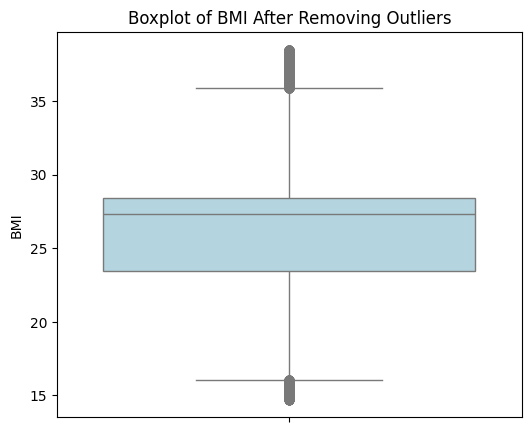

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "diabetes_prediction_dataset.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Calculate IQR (Interquartile Range) for BMI
Q1 = df['bmi'].quantile(0.25)  # 25th percentile
Q3 = df['bmi'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

# Plot the boxplot for BMI after removing outliers
plt.figure(figsize=(6, 5))
sns.boxplot(y=df_cleaned['bmi'], color='lightblue')
plt.title("Boxplot of BMI After Removing Outliers")
plt.ylabel("BMI")

# Show the plot
plt.show()


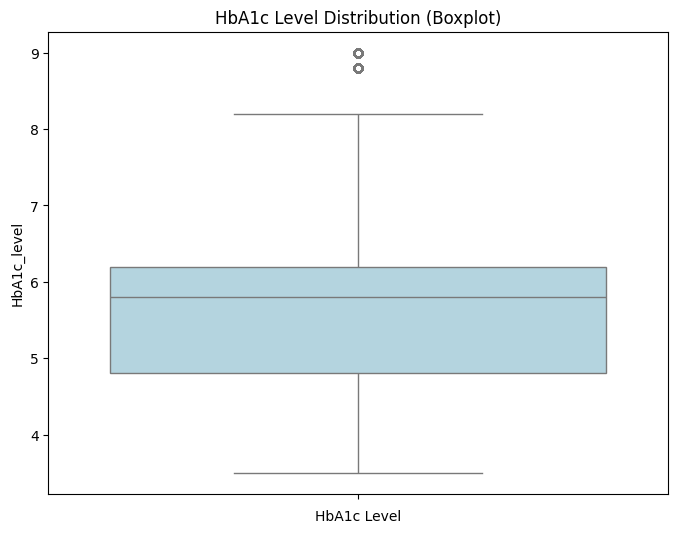

In [ ]:
# Plot a boxplot for HbA1c level distribution
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['HbA1c_level'], color="lightblue")
plt.title("HbA1c Level Distribution (Boxplot)")
plt.xlabel("HbA1c Level")
plt.show()


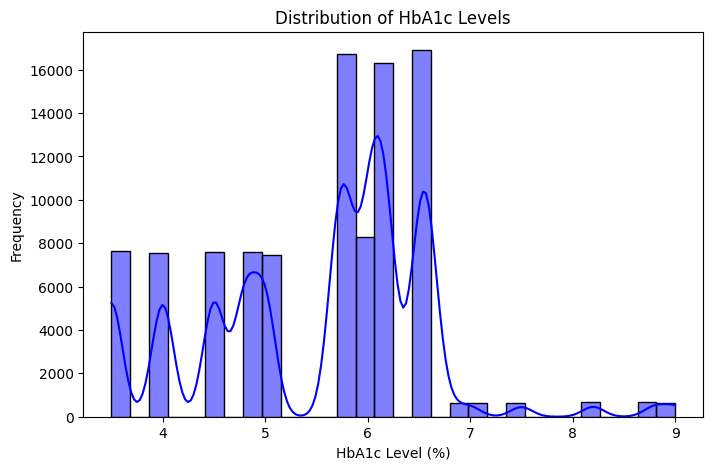

In [ ]:
# Plot the distribution of HbA1c levels
plt.figure(figsize=(8, 5))
sns.histplot(df['HbA1c_level'], bins=30, kde=True, color='blue')
plt.title("Distribution of HbA1c Levels")
plt.xlabel("HbA1c Level (%)")
plt.ylabel("Frequency")
plt.show()



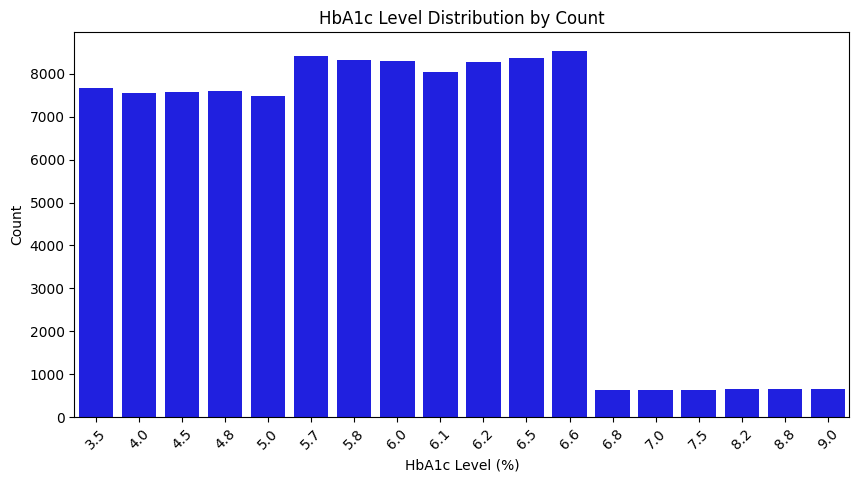

In [ ]:
# Plot the distribution of HbA1c levels by count
plt.figure(figsize=(10, 5))
sns.barplot(x=hbA1c_distribution['HbA1c Level'], y=hbA1c_distribution['Count'], color='blue')
plt.title("HbA1c Level Distribution by Count")
plt.xlabel("HbA1c Level (%)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



In [ ]:

# Count occurrences of each Blood Glucose Level
blood_glucose_distribution = df['blood_glucose_level'].value_counts().reset_index()
blood_glucose_distribution.columns = ['Blood Glucose Level', 'Count']

# Display the distribution table
print(blood_glucose_distribution)

    Blood Glucose Level  Count
0                   130   7794
1                   159   7759
2                   140   7732
3                   160   7712
4                   126   7702
5                   145   7679
6                   200   7600
7                   155   7575
8                    90   7112
9                    80   7106
10                  158   7026
11                  100   7025
12                   85   6901
13                  280    729
14                  300    674
15                  240    636
16                  260    635
17                  220    603


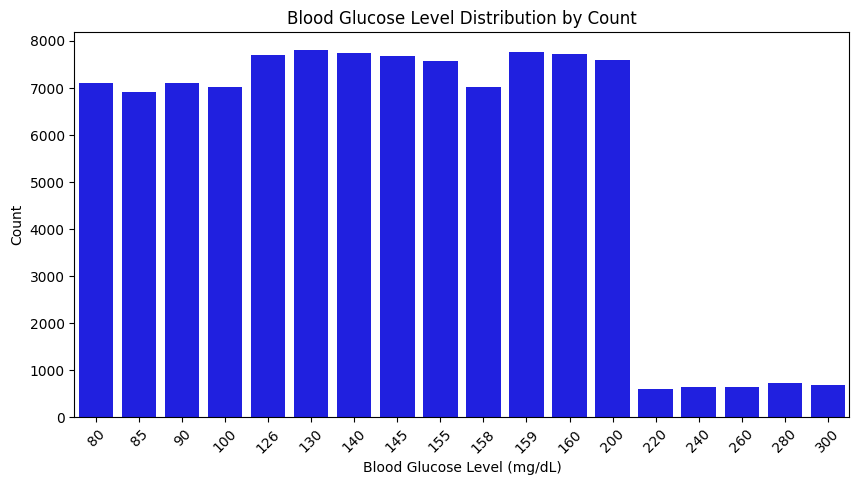

In [ ]:
# Plot the distribution of Blood Glucose Levels by count
plt.figure(figsize=(10, 5))
sns.barplot(x=blood_glucose_distribution['Blood Glucose Level'],
            y=blood_glucose_distribution['Count'],
            color='blue')
plt.title("Blood Glucose Level Distribution by Count")
plt.xlabel("Blood Glucose Level (mg/dL)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

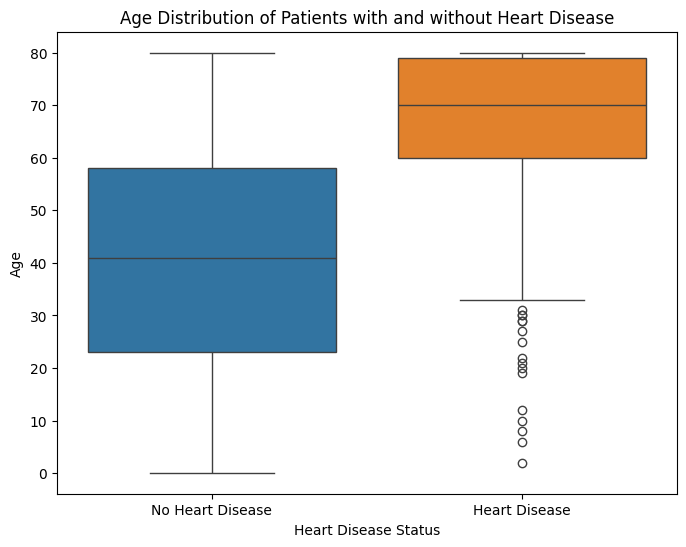

In [ ]:
# Comparing the age distribution of patients with and without heart disease.
# Create a boxplot to compare age distribution between patients with and without heart disease
plt.figure(figsize=(8, 6))
sns.boxplot(x="heart_disease", y="age", data=df, hue="heart_disease", palette={0: "#1f77b4", 1: "#ff7f0e"}, legend=False)
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.title("Age Distribution of Patients with and without Heart Disease")
plt.xlabel("Heart Disease Status")
plt.ylabel("Age")
plt.show()




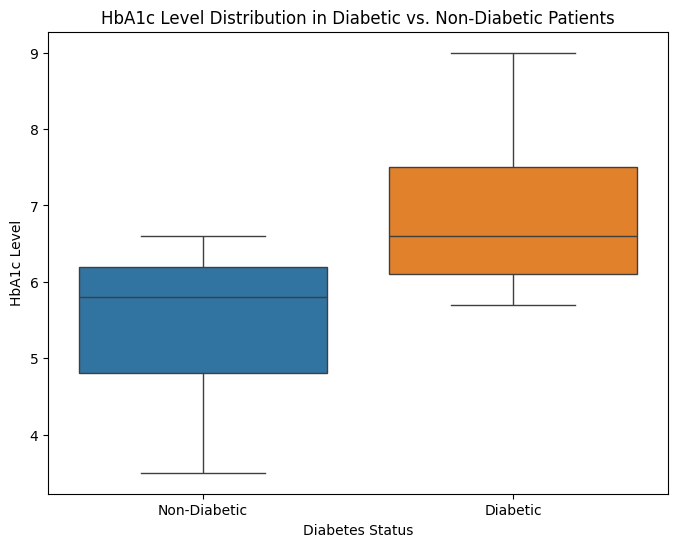

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="diabetes", y="HbA1c_level", data=df, hue="diabetes", palette={0: "#1f77b4", 1: "#ff7f0e"}, legend=False)
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.title("HbA1c Level Distribution in Diabetic vs. Non-Diabetic Patients")
plt.xlabel("Diabetes Status")
plt.ylabel("HbA1c Level")
plt.show()


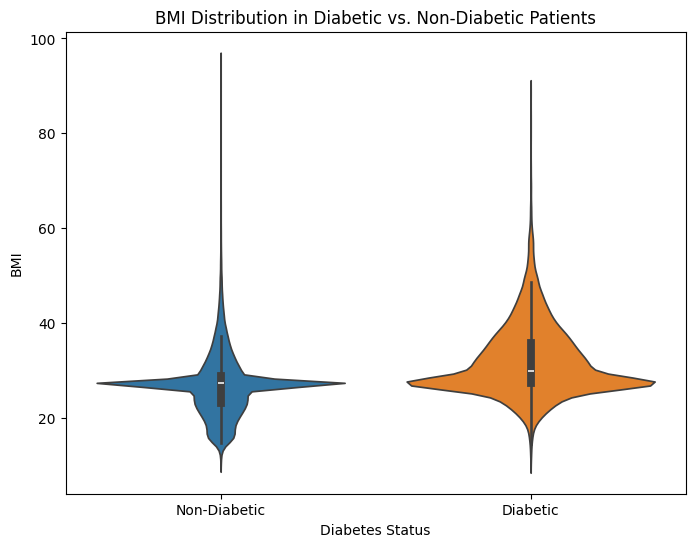

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="diabetes", y="bmi", data=df, hue="diabetes", palette={0: "#1f77b4", 1: "#ff7f0e"}, legend=False)
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.title("BMI Distribution in Diabetic vs. Non-Diabetic Patients")
plt.xlabel("Diabetes Status")
plt.ylabel("BMI")
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = "diabetes_prediction_dataset.csv"  # Update if needed
df_new = pd.read_csv(file_path)

# Define HbA1c categories for initial diagnosis
hbA1c_bins = [0, 5.7, 6.4, float('inf')]
hbA1c_labels = ['Normal', 'Prediabetes', 'Diabetes']
df_new['HbA1c_Category'] = pd.cut(df_new['HbA1c_level'], bins=hbA1c_bins, labels=hbA1c_labels, include_lowest=True)

# Calculate the percentage of actual diabetes cases within each HbA1c category
hbA1c_diabetes_distribution = df_new.groupby('HbA1c_Category', observed=False)['diabetes'].mean() * 100

# Convert to DataFrame for better visualization
hbA1c_diabetes_summary = hbA1c_diabetes_distribution.reset_index()
hbA1c_diabetes_summary.columns = ['HbA1c Level', 'Percentage with Diabetes']

# Display the summary
print(hbA1c_diabetes_summary)




   HbA1c Level  Percentage with Diabetes
0       Normal                  1.521504
1  Prediabetes                  7.909999
2     Diabetes                 24.960331


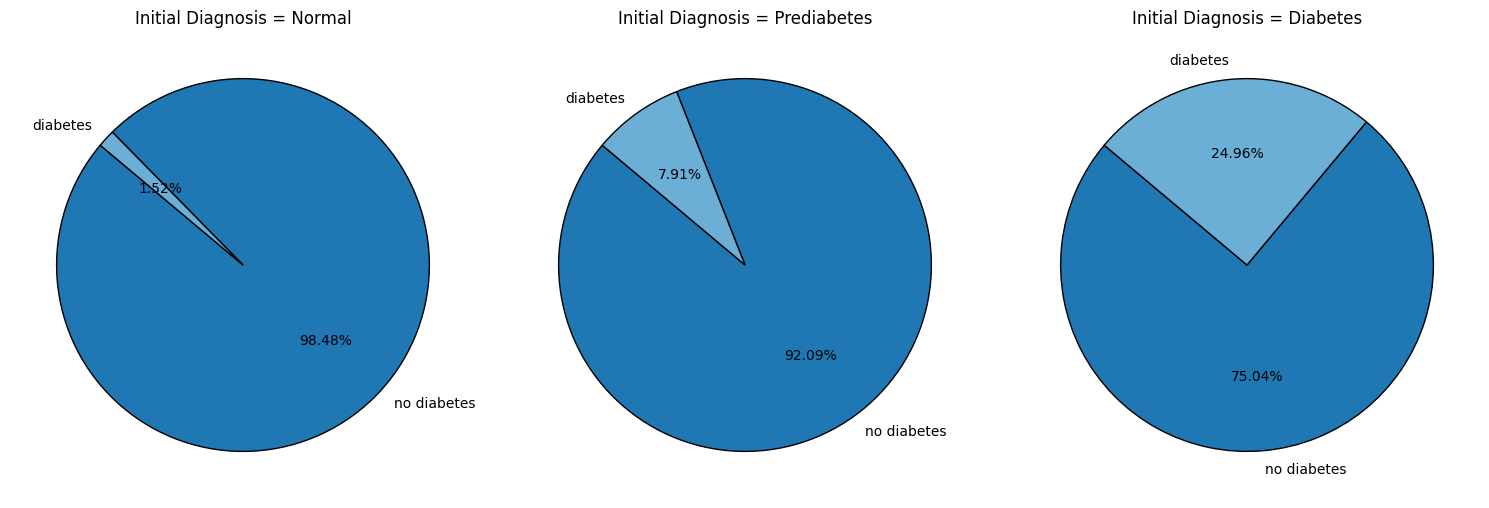

In [ ]:
# Define diabetes status labels
labels = ['no diabetes', 'diabetes']
colors = ['#1f77b4', '#6baed6']  # Different shades of blue

# Create subplots for each HbA1c category
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through each category and plot a pie chart
for i, category in enumerate(hbA1c_diabetes_summary['HbA1c Level']):
    diabetes_percentage = hbA1c_diabetes_summary.loc[hbA1c_diabetes_summary['HbA1c Level'] == category, 'Percentage with Diabetes'].values[0]
    no_diabetes_percentage = 100 - diabetes_percentage

    axes[i].pie([no_diabetes_percentage, diabetes_percentage],
                labels=labels,
                autopct='%1.2f%%',
                colors=colors,
                startangle=140,
                wedgeprops={'edgecolor': 'black'})

    axes[i].set_title(f"Initial Diagnosis = {category}")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()




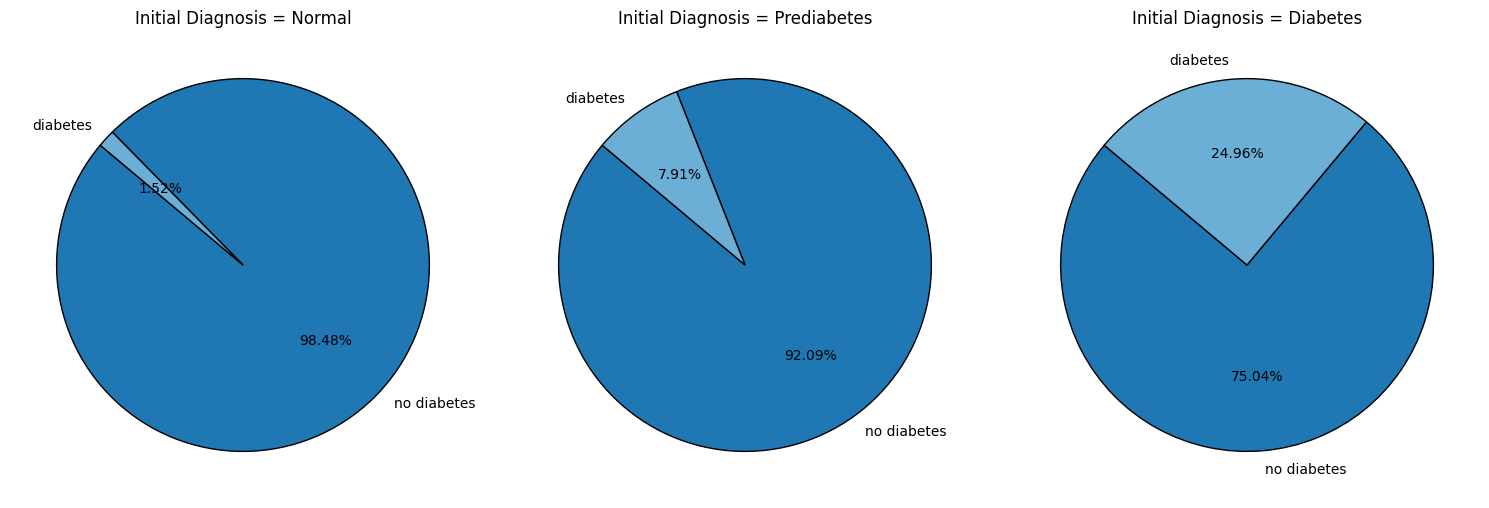

In [ ]:
# prompt: add the title # Define diabetes status labels
# labels = ['no diabetes', 'diabetes']
# colors = ['#1f77b4', '#6baed6']  # Different shades of blue
# # Create subplots for each HbA1c category
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# # Loop through each category and plot a pie chart
# for i, category in enumerate(hbA1c_diabetes_summary['HbA1c Level']):
#     diabetes_percentage = hbA1c_diabetes_summary.loc[hbA1c_diabetes_summary['HbA1c Level'] == category, 'Percentage with Diabetes'].values[0]
#     no_diabetes_percentage = 100 - diabetes_percentage
#     axes[i].pie([no_diabetes_percentage, diabetes_percentage],
#                 labels=labels,
#                 autopct='%1.2f%%',
#                 colors=colors,
#                 startangle=140,
#                 wedgeprops={'edgecolor': 'black'})
#     axes[i].set_title(f"Initial Diagnosis = {category}")
# # Adjust layout and show the plots
# plt.tight_layout()
# plt.show()

import matplotlib.pyplot as plt
# Define diabetes status labels
labels = ['no diabetes', 'diabetes']
colors = ['#1f77b4', '#6baed6']  # Different shades of blue

# Create subplots for each HbA1c category
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through each category and plot a pie chart
for i, category in enumerate(hbA1c_diabetes_summary['HbA1c Level']):
    diabetes_percentage = hbA1c_diabetes_summary.loc[hbA1c_diabetes_summary['HbA1c Level'] == category, 'Percentage with Diabetes'].values[0]
    no_diabetes_percentage = 100 - diabetes_percentage
    axes[i].pie([no_diabetes_percentage, diabetes_percentage],
                labels=labels,
                autopct='%1.2f%%',
                colors=colors,
                startangle=140,
                wedgeprops={'edgecolor': 'black'})
    axes[i].set_title(f"Initial Diagnosis = {category}")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


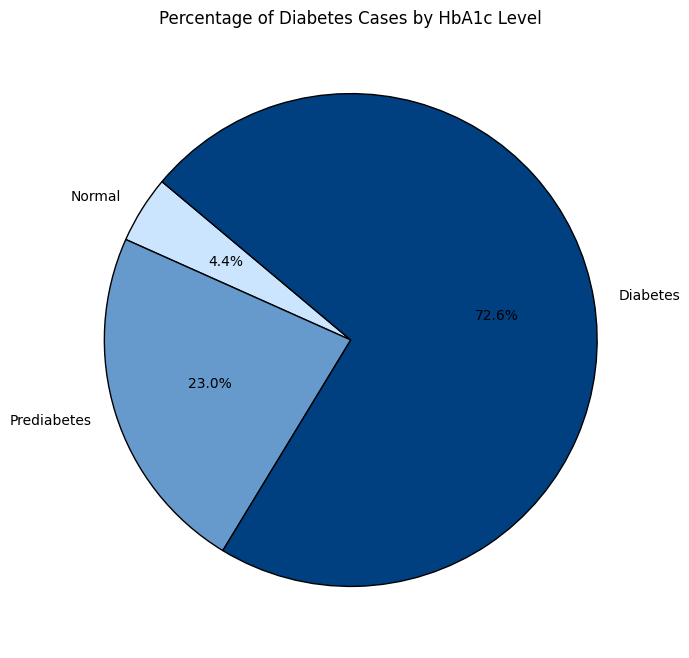

In [ ]:
import matplotlib.pyplot as plt

# Define different shades of blue for the pie chart
colors = ['#cce5ff', '#6699cc', '#004080']  # Light to dark blue shades

# Create a pie chart for the distribution of diabetes cases within each HbA1c category
plt.figure(figsize=(8, 8))
plt.pie(hbA1c_diabetes_summary['Percentage with Diabetes'],
        labels=hbA1c_diabetes_summary['HbA1c Level'],
        autopct='%1.1f%%',
        colors=colors,
        startangle=140,
        wedgeprops={'edgecolor': 'black'})

# Set title
plt.title("Percentage of Diabetes Cases by HbA1c Level")

# Show the chart
plt.show()



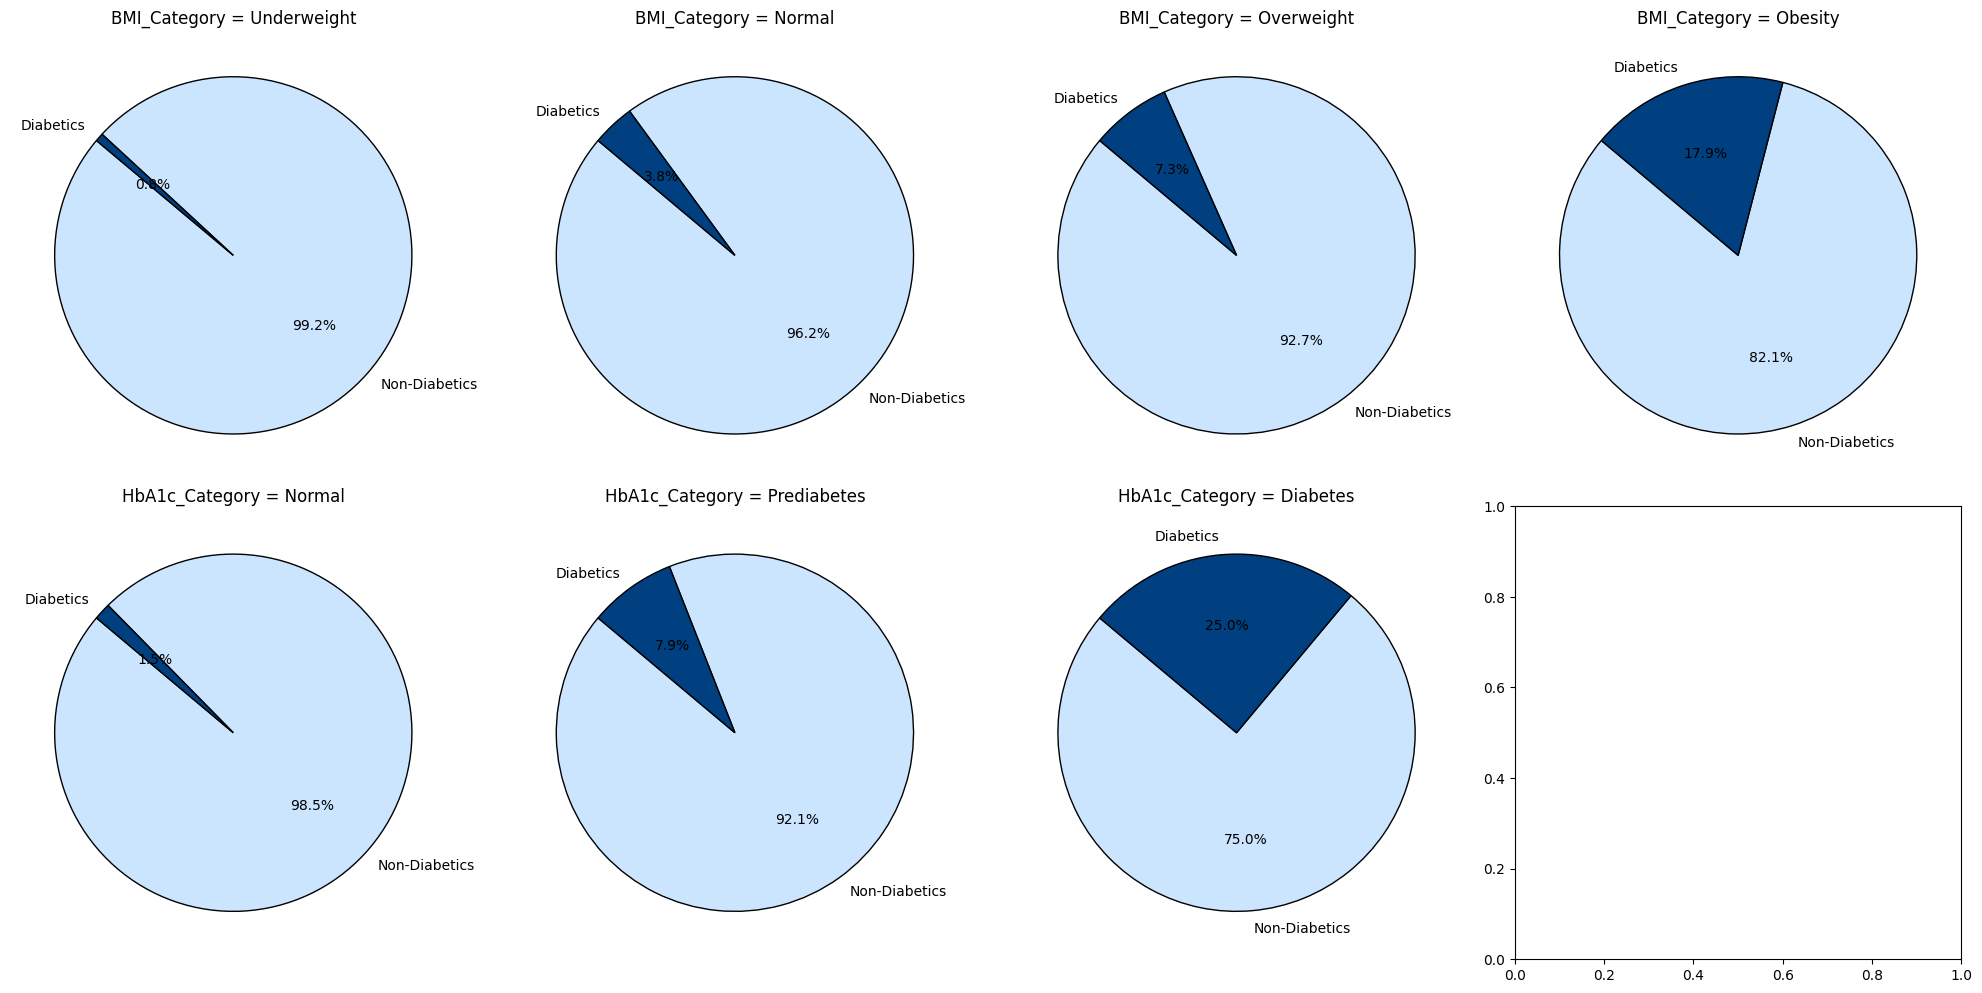

In [ ]:
import matplotlib.pyplot as plt

# Define diabetes status labels and shades of blue
labels = ['Non-Diabetics', 'Diabetics']
colors = ['#cce5ff', '#004080']  # Light to dark blue shades

# Define ordinal categories
ordinal_categories = ['BMI_Category', 'HbA1c_Category']

# Create subplots for each ordinal category
fig, axes = plt.subplots(len(ordinal_categories), len(df_new['BMI_Category'].unique()), figsize=(20, 10))

# Loop through each ordinal category and plot a pie chart
for row, category in enumerate(ordinal_categories):
    category_distribution = df_new.groupby(category, observed=False)['diabetes'].value_counts(normalize=True).unstack() * 100

    for col, cat in enumerate(category_distribution.index):
        diabetes_percentage = category_distribution.loc[cat, 1] if 1 in category_distribution.columns else 0
        non_diabetes_percentage = category_distribution.loc[cat, 0] if 0 in category_distribution.columns else 100

        axes[row, col].pie([non_diabetes_percentage, diabetes_percentage],
                           labels=labels,
                           autopct='%1.1f%%',
                           colors=colors,
                           startangle=140,
                           wedgeprops={'edgecolor': 'black'})

        axes[row, col].set_title(f"{category} = {cat}")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()





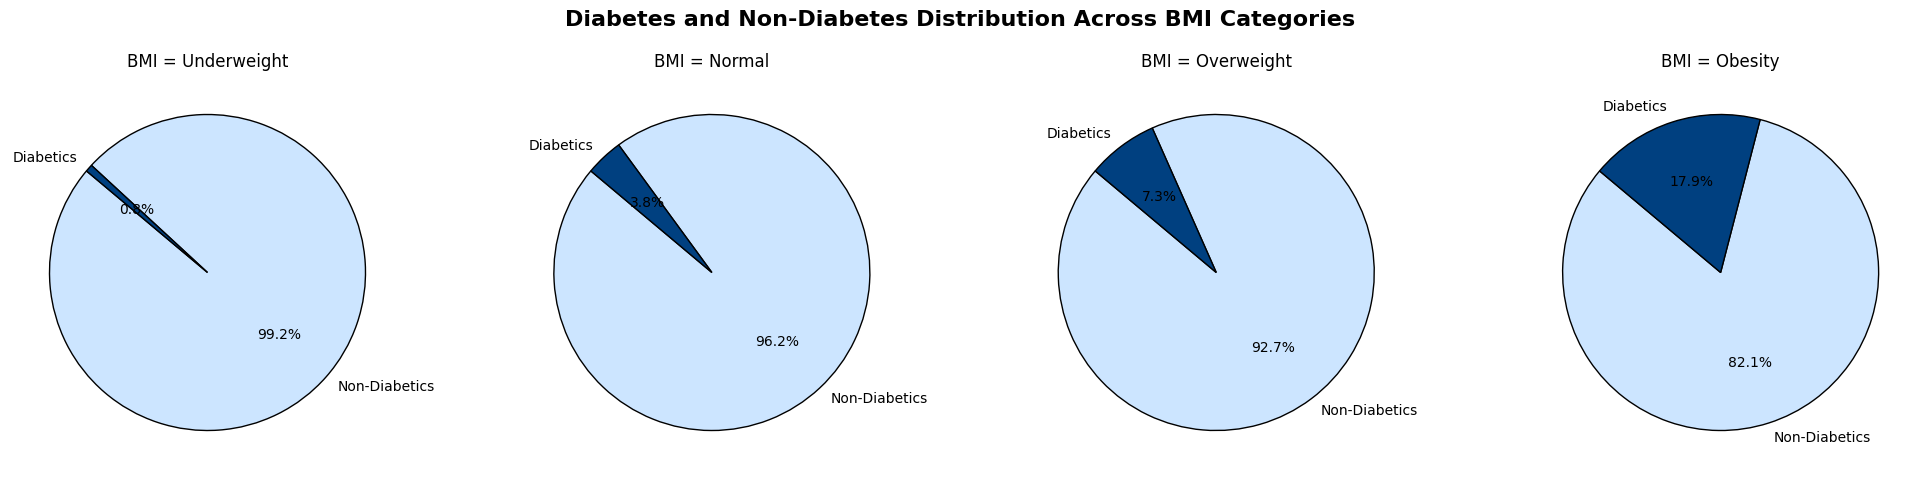

In [ ]:
import matplotlib.pyplot as plt

# Define diabetes status labels and shades of blue
labels = ['Non-Diabetics', 'Diabetics']
colors = ['#cce5ff', '#004080']  # Light to dark blue shades

# Create subplots for BMI categories
fig, axes = plt.subplots(1, len(df_new['BMI_Category'].unique()), figsize=(20, 5))

# Group data by BMI category and diabetes status
bmi_distribution = df_new.groupby('BMI_Category', observed=False)['diabetes'].value_counts(normalize=True).unstack() * 100

# Loop through each BMI category and plot a pie chart
for col, category in enumerate(bmi_distribution.index):
    diabetes_percentage = bmi_distribution.loc[category, 1] if 1 in bmi_distribution.columns else 0
    non_diabetes_percentage = bmi_distribution.loc[category, 0] if 0 in bmi_distribution.columns else 100

    axes[col].pie([non_diabetes_percentage, diabetes_percentage],
                  labels=labels,
                  autopct='%1.1f%%',
                  colors=colors,
                  startangle=140,
                  wedgeprops={'edgecolor': 'black'})

    axes[col].set_title(f"BMI = {category}")

# Add overall title
plt.suptitle("Diabetes and Non-Diabetes Distribution Across BMI Categories", fontsize=16, fontweight='bold')

# Adjust layout and show the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



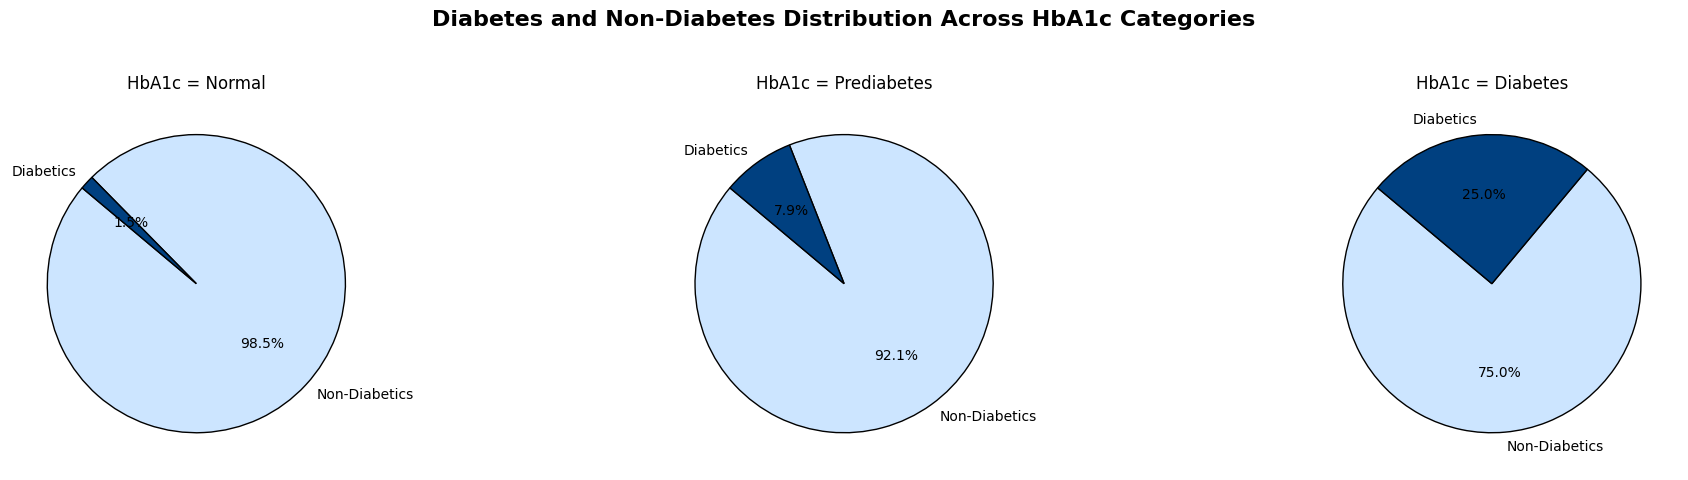

In [ ]:
import matplotlib.pyplot as plt

# Define diabetes status labels and shades of blue
labels = ['Non-Diabetics', 'Diabetics']
colors = ['#cce5ff', '#004080']  # Light to dark blue shades

# Create subplots for HbA1c categories
fig, axes = plt.subplots(1, len(df_new['HbA1c_Category'].unique()), figsize=(20, 5))

# Group data by HbA1c category and diabetes status
hba1c_distribution = df_new.groupby('HbA1c_Category', observed=False)['diabetes'].value_counts(normalize=True).unstack() * 100

# Loop through each HbA1c category and plot a pie chart
for col, category in enumerate(hba1c_distribution.index):
    diabetes_percentage = hba1c_distribution.loc[category, 1] if 1 in hba1c_distribution.columns else 0
    non_diabetes_percentage = hba1c_distribution.loc[category, 0] if 0 in hba1c_distribution.columns else 100

    axes[col].pie([non_diabetes_percentage, diabetes_percentage],
                  labels=labels,
                  autopct='%1.1f%%',
                  colors=colors,
                  startangle=140,
                  wedgeprops={'edgecolor': 'black'})

    axes[col].set_title(f"HbA1c = {category}")

# Add overall title
plt.suptitle("Diabetes and Non-Diabetes Distribution Across HbA1c Categories", fontsize=16, fontweight='bold')

# Adjust layout and show the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


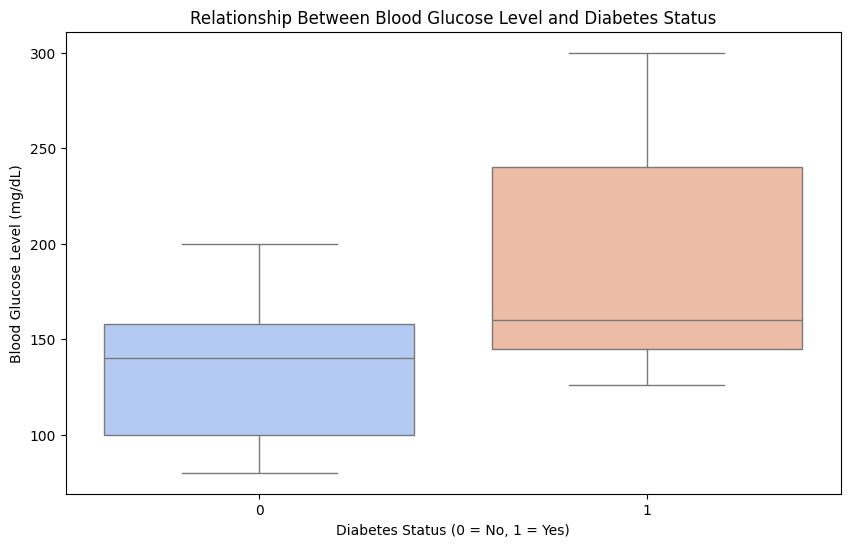

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of Blood Glucose Levels vs. Diabetes Status
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_new['diabetes'], y=df_new['blood_glucose_level'], hue=df_new['diabetes'], palette="coolwarm", legend=False)

# Set plot labels and title
plt.title("Relationship Between Blood Glucose Level and Diabetes Status")
plt.xlabel("Diabetes Status (0 = No, 1 = Yes)")
plt.ylabel("Blood Glucose Level (mg/dL)")

# Show the plot
plt.show()


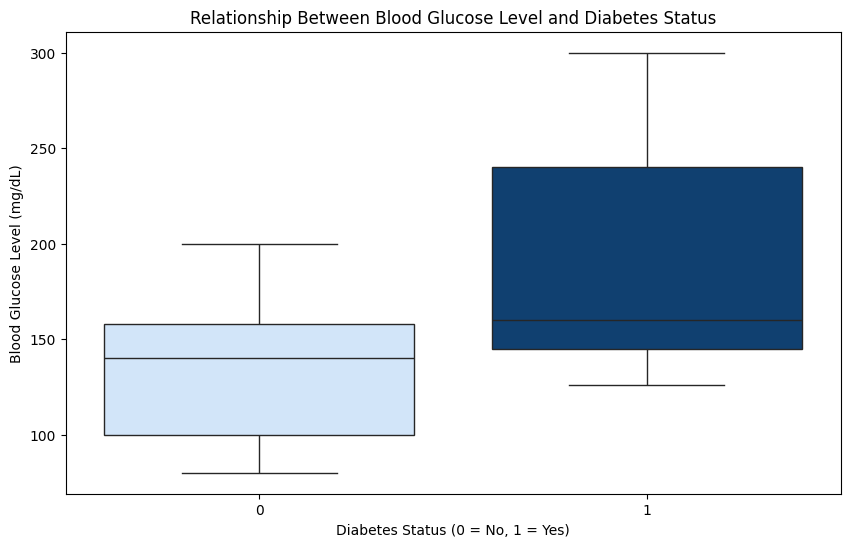

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of Blood Glucose Levels vs. Diabetes Status using shades of blue
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_new['diabetes'], y=df_new['blood_glucose_level'], hue=df_new['diabetes'],
            palette=['#cce5ff', '#004080'], legend=False)  # Light to dark blue shades

# Set plot labels and title
plt.title("Relationship Between Blood Glucose Level and Diabetes Status")
plt.xlabel("Diabetes Status (0 = No, 1 = Yes)")
plt.ylabel("Blood Glucose Level (mg/dL)")

# Show the plot
plt.show()



<ipython-input-39-32f56af5aab9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['heart_disease'], y=df['age'], palette=["#1f77b4", "#ff7f0e"])


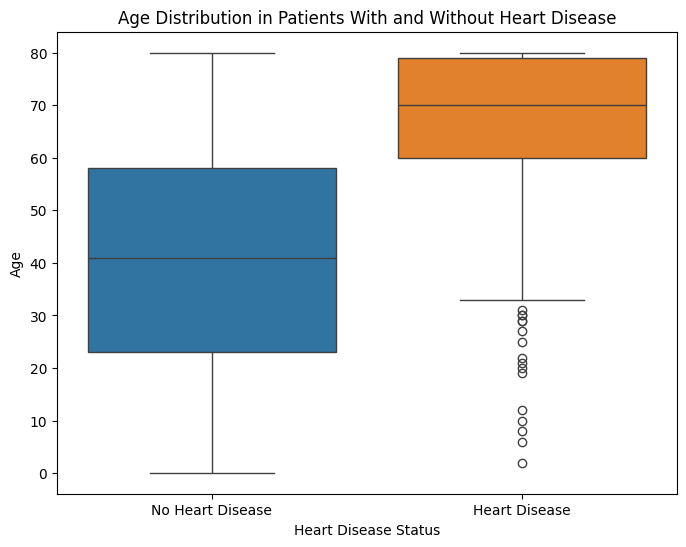

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['heart_disease'], y=df['age'], palette=["#1f77b4", "#ff7f0e"])
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.title("Age Distribution in Patients With and Without Heart Disease")
plt.xlabel("Heart Disease Status")
plt.ylabel("Age")
plt.show()


In [ ]:
# Define HbA1c level categories based on diabetes classification
hba1c_bins = [0, 5.7, 6.4, float('inf')]
hba1c_labels = ['Normal', 'Prediabetes', 'Diabetes']
df['HbA1c_Category'] = pd.cut(df['HbA1c_level'], bins=hba1c_bins, labels=hba1c_labels)

# Calculate percentage of diabetics in each HbA1c category
hba1c_diabetes_counts = df.groupby('HbA1c_Category', observed=True)['diabetes'].mean() * 100

# Create a structured table
hba1c_table = pd.DataFrame({
    'HbA1c Level Category': hba1c_labels,
    'Prediction': [f"{hba1c_diabetes_counts.get(category, 0):.2f}% have diabetes" for category in hba1c_labels]
})

# Display the table
print(hba1c_table)


  HbA1c Level Category            Prediction
0               Normal   1.52% have diabetes
1          Prediabetes   7.91% have diabetes
2             Diabetes  24.96% have diabetes


In [ ]:
# Define HbA1c level categories
hba1c_bins = [0, 5.7, 6.4, float('inf')]
hba1c_labels = ['< 5.7', '5.7 - 6.4', '>= 6.5']
df['HbA1c_Category'] = pd.cut(df['HbA1c_level'], bins=hba1c_bins, labels=hba1c_labels, include_lowest=True)

# Calculate percentage of diabetics in each HbA1c category
hba1c_diabetes_counts = df.groupby('HbA1c_Category', observed=True)['diabetes'].mean() * 100

# Create a structured table
hba1c_table = pd.DataFrame({
    'HbA1c Level': hba1c_labels,
    'Prediction': [f"{hba1c_diabetes_counts.get(category, 0):.2f}% have diabetes" for category in hba1c_labels]
})

# Display the table
print(hba1c_table)



  HbA1c Level            Prediction
0       < 5.7   1.52% have diabetes
1   5.7 - 6.4   7.91% have diabetes
2      >= 6.5  24.96% have diabetes


In [ ]:

# Define BMI categories
bmi_bins = [0, 18.5, 24.9, 29.9, float('inf')]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obesity']
df['BMI_Category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, include_lowest=True)

# Calculate percentage of diabetics in each BMI category
bmi_diabetes_counts = df.groupby('BMI_Category', observed=True)['diabetes'].mean() * 100

# Create a structured table
bmi_table = pd.DataFrame({
    'BMI Category': bmi_labels,
    'Prediction': [f"{bmi_diabetes_counts.get(category, 0):.2f}% have diabetes" for category in bmi_labels]
})

# Display the table
print(bmi_table)


  BMI Category            Prediction
0  Underweight   0.75% have diabetes
1       Normal   3.84% have diabetes
2   Overweight   7.25% have diabetes
3      Obesity  17.91% have diabetes


In [ ]:

# Define Blood Glucose Level categories
glucose_bins = [0, 99, 125, float('inf')]
glucose_labels = ['≤ 99', '100 – 125', '≥ 126']
df['Glucose_Category'] = pd.cut(df['blood_glucose_level'], bins=glucose_bins, labels=glucose_labels, include_lowest=True)

# Calculate percentage of diabetics in each Blood Glucose Level category
glucose_diabetes_counts = df.groupby('Glucose_Category', observed=True)['diabetes'].mean() * 100

# Create a structured table
glucose_table = pd.DataFrame({
    'Blood Glucose Level': glucose_labels,
    'Prediction': [f"{glucose_diabetes_counts.get(category, 0):.2f}% have diabetes" for category in glucose_labels]
})

# Display the table
print(glucose_table)



  Blood Glucose Level            Prediction
0                ≤ 99   0.00% have diabetes
1           100 – 125   0.00% have diabetes
2               ≥ 126  11.83% have diabetes


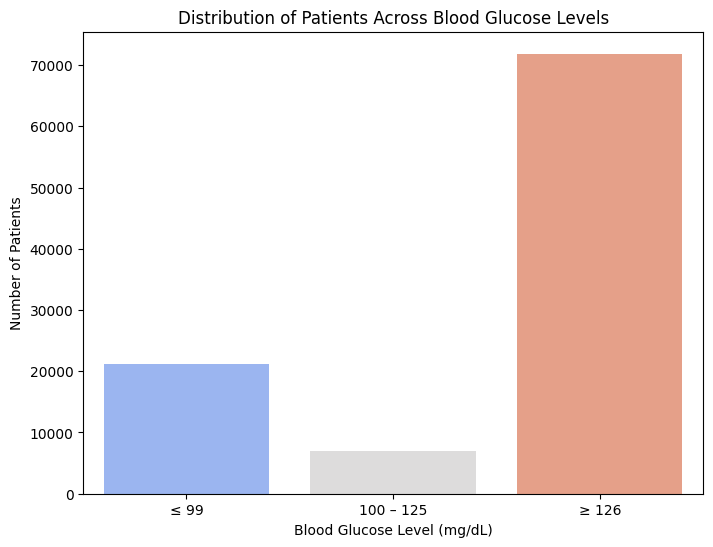

In [ ]:
# Define Blood Glucose Level categories
glucose_bins = [0, 99, 125, float('inf')]
glucose_labels = ['≤ 99', '100 – 125', '≥ 126']
df['Glucose_Category'] = pd.cut(df['blood_glucose_level'], bins=glucose_bins, labels=glucose_labels, include_lowest=True)

# Plot a bar chart for blood glucose categories (Fixing FutureWarning)
plt.figure(figsize=(8, 6))
sns.countplot(x="Glucose_Category", data=df, hue="Glucose_Category", palette="coolwarm", legend=False)
plt.title("Distribution of Patients Across Blood Glucose Levels")
plt.xlabel("Blood Glucose Level (mg/dL)")
plt.ylabel("Number of Patients")
plt.show()



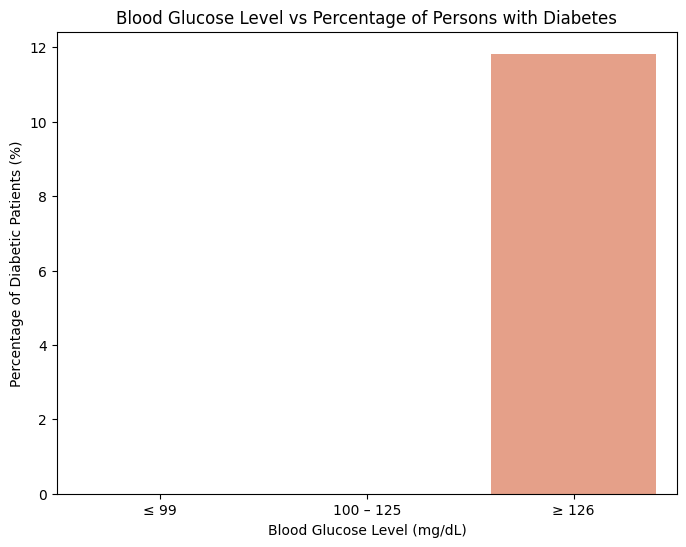

In [ ]:
# Define Blood Glucose Level categories
glucose_bins = [0, 99, 125, float('inf')]
glucose_labels = ['≤ 99', '100 – 125', '≥ 126']
df['Glucose_Category'] = pd.cut(df['blood_glucose_level'], bins=glucose_bins, labels=glucose_labels, include_lowest=True)

# Calculate percentage of diabetics in each Blood Glucose Level category
glucose_diabetes_counts = df.groupby('Glucose_Category', observed=True)['diabetes'].mean() * 100

# Create a bar plot for Blood Glucose Level vs Percentage of Persons with Diabetes (Fixing FutureWarning)
plt.figure(figsize=(8, 6))
sns.barplot(x=glucose_diabetes_counts.index, y=glucose_diabetes_counts.values, hue=glucose_diabetes_counts.index, palette="coolwarm", legend=False)
plt.title("Blood Glucose Level vs Percentage of Persons with Diabetes")
plt.xlabel("Blood Glucose Level (mg/dL)")
plt.ylabel("Percentage of Diabetic Patients (%)")
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





In [ ]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

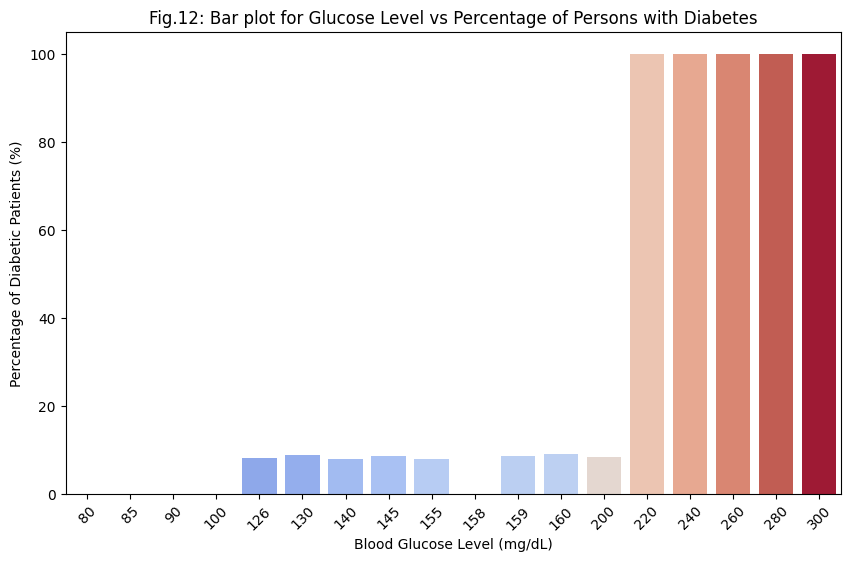

In [ ]:
# Group data by blood glucose level and count diabetes cases
blood_glucose_summary = df.groupby('blood_glucose_level').agg(
    diabetes=('diabetes', 'sum'),  # Count of diabetes cases
    total=('diabetes', 'count')  # Total instances per blood glucose level
).reset_index()

# Calculate the percentage of diabetes cases for each blood glucose level
blood_glucose_summary['percentage'] = (blood_glucose_summary['diabetes'] / blood_glucose_summary['total']) * 100

# Create a bar plot for Blood Glucose Level vs Percentage of Persons with Diabetes (Fixing FutureWarning)
plt.figure(figsize=(10, 6))
sns.barplot(x="blood_glucose_level", y="percentage", data=blood_glucose_summary, hue="blood_glucose_level", palette="coolwarm", legend=False)

# Customize the plot
plt.title("Fig.12: Bar plot for Glucose Level vs Percentage of Persons with Diabetes")
plt.xlabel("Blood Glucose Level (mg/dL)")
plt.ylabel("Percentage of Diabetic Patients (%)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



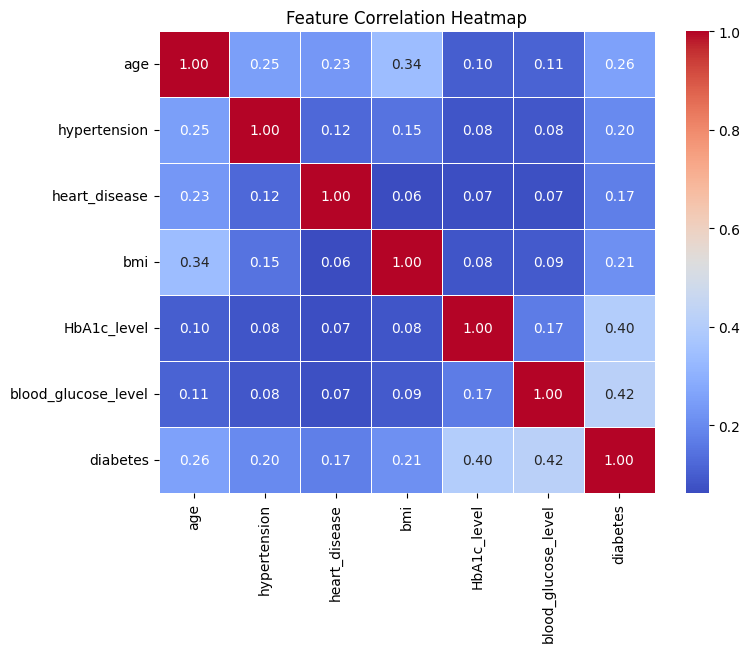

In [ ]:
#Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()